## Ejercicio de Feedback: Clustering

# Introducción y planteamiento del problema

"**Ayuda Internacional**" es una ONG humanitaria internacional comprometida con la lucha contra la pobreza y con proporcionar a las personas de países subdesarrollados servicios básicos y ayuda en tiempos de desastres y calamidades naturales. Esta ONG ha logrado recaudar aproximadamente 10 millones de dólares. Este dinero debe ahora asignarse de manera estratégica y eficaz. Por lo tanto, para decidir la selección de los países que más necesitan ayuda, se deben tomar decisiones basadas en datos.

En consecuencia, resulta necesario **categorizar los países utilizando factores socioeconómicos y de salud** que determinen el desarrollo general de cada país. Basándose en estos grupos de países, definidos por sus condiciones, se distribuirán los fondos para brindar asistencia durante desastres y calamidades naturales. Este es un caso claro de clustering, donde se requiere crear grupos de países basados en las diferentes características presentes.

**Objetivo**:


*   Agrupar países en función de características numéricas socioeconómicas.
*   Determinar qué grupos de países requieren ayuda y en qué grado



## Nuestro conjunto de datos




* **country**: Nombre del país.
* **child_mort**: Muertes de niños menores de 5 años por cada 1000 nacidos vivos.
* **exports**: Exportaciones de bienes y servicios per cápita, expresadas como porcentaje del PIB per cápita.
* **health**: Gasto total en salud per cápita, expresado como porcentaje del PIB per cápita.
* **imports**: Importaciones de bienes y servicios per cápita, expresadas como porcentaje del PIB per cápita.
* **Income**: Ingreso neto por persona.
* **Inflation**: Tasa de crecimiento anual del PIB total.
* **life_expec**: Número promedio de años que un recién nacido viviría si se mantienen los patrones actuales de mortalidad.
* **total_fer**: Número de hijos que nacerían por mujer si las tasas actuales de fertilidad por edad permanecen constantes.
* **gdpp**: PIB per cápita, calculado como el PIB total dividido entre la población total.




## 1 Importación de librerías

In [ ]:
#Es posible que necesitéis estas librerías (y muchas más)
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
!pip install -U kaleido
import kaleido
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 2 Análisis Exploratorio de los datos

**Ejercicio 1** - Llevar a cabo un procedimiento de EDA para obtener información acerca de los datos:

*  Declara el tamaño del dataset y muestra algunos registros por pantalla. Muestra los estadísticos (media, desviación típica, min, max...) relevantes de cada una de las variables. Observando el tipo de características, ¿podemos usarlas todas en un algoritmo de agrupación?

*  Analiza la distribución de cada una de las variables mediante gráficas de densidad y boxplots (se valora utilizar el mínimo código posible para mostrar todas las gráficas). ¿Están bien distribuidas las variables? ¿Qué podemos comentar de este análisis?



In [ ]:
import pandas as pd # Import the pandas library

Data = pd.read_csv('Country-data.csv') # Use pd.read_csv to read the CSV file, and enclose the file name with quotes

In [ ]:
Data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [ ]:
Data.size

1670

In [ ]:
Data.shape

(167, 10)

In [ ]:
Data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
Data.isna().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


Tenemos un DF perfectamente balanceado en el cual no tenemos valores nulos, es decir está preparado para trabajar con el.

En primera instancia podemos decir que todas nuestras variables son numéricas, por tanto podríamos usarlas para nuestros algoritmos de agrupación, sin embargo tendremos que hacer un estudio de la correlación para evitar redundancias, asimismo las variables se encuesntran en escalas diferentes, por lo tanto también tendremos que utilizar un reescalado de estas para conseguir un algoritmo de agrupacióin funcional. En el caso de la variable country debemos convertirla en numérica a través de un método encoding para que pueda ser procesada.

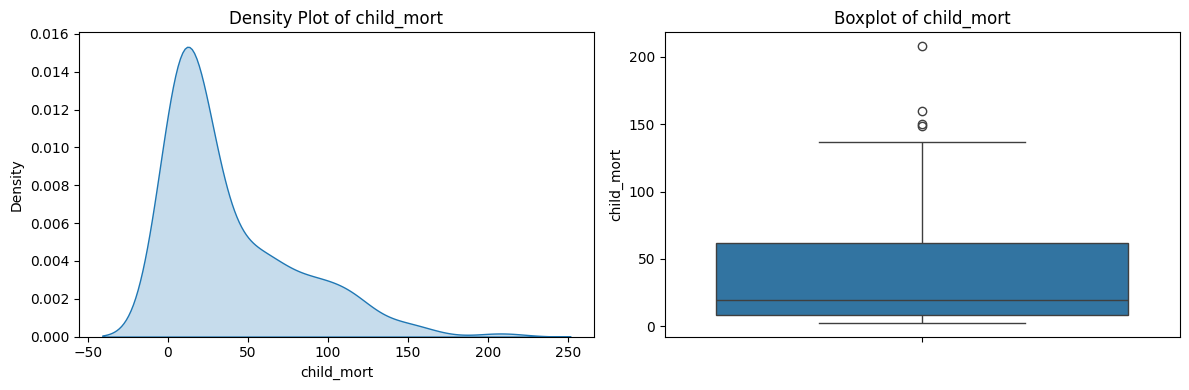

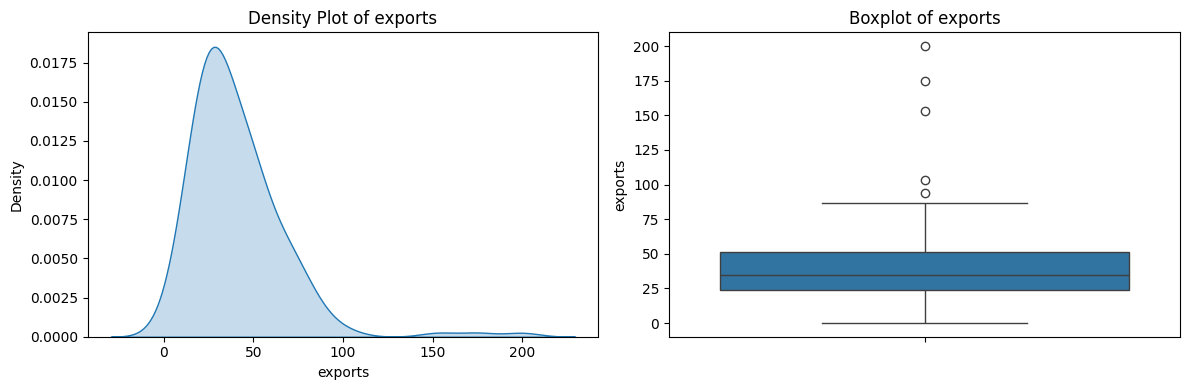

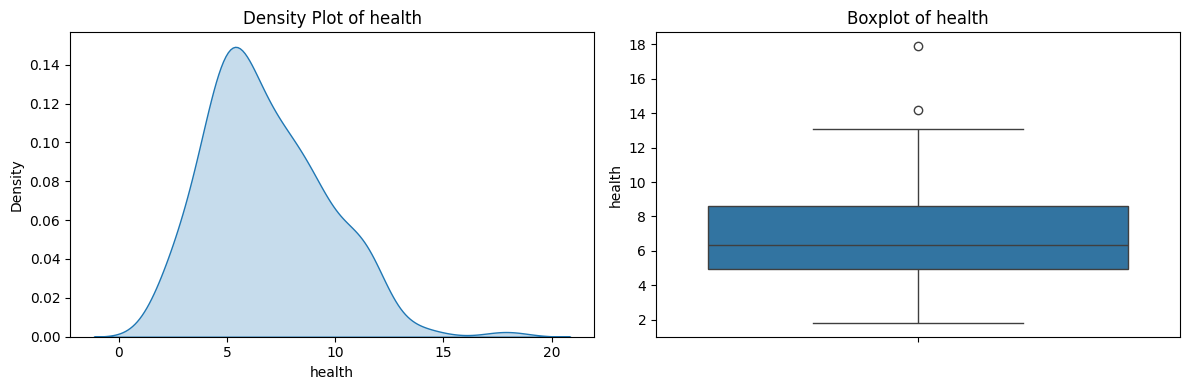

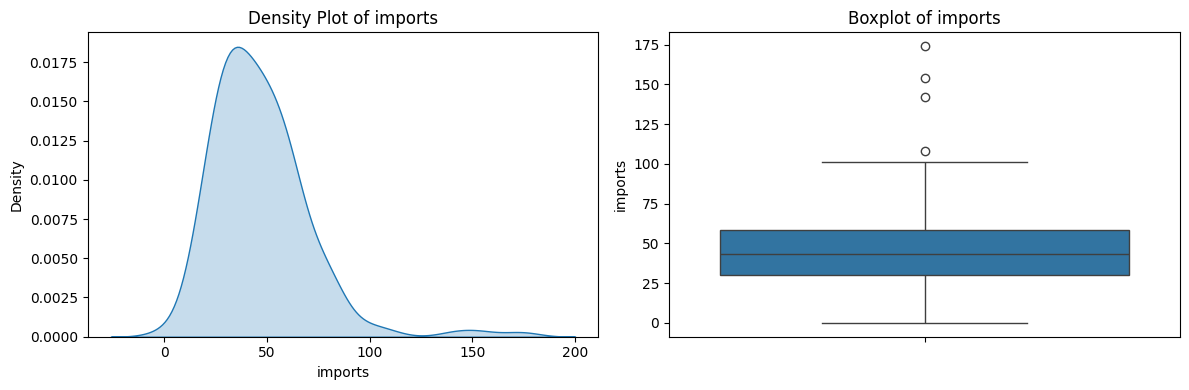

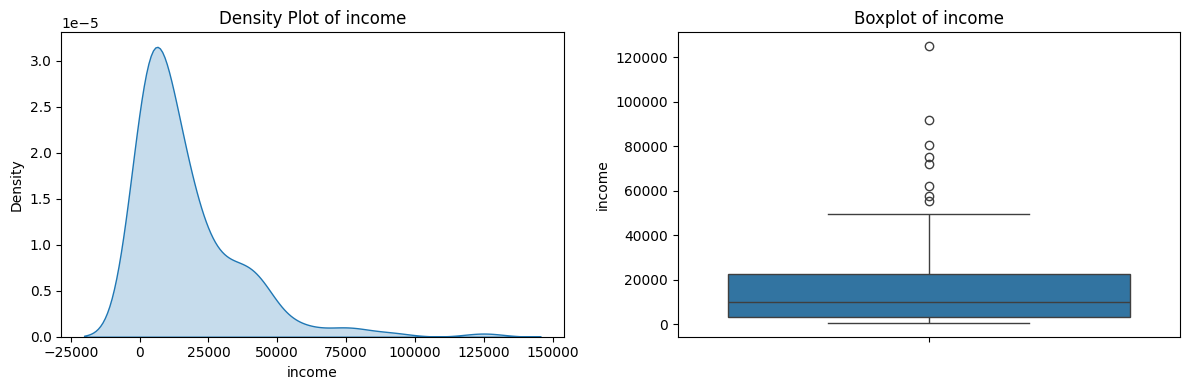

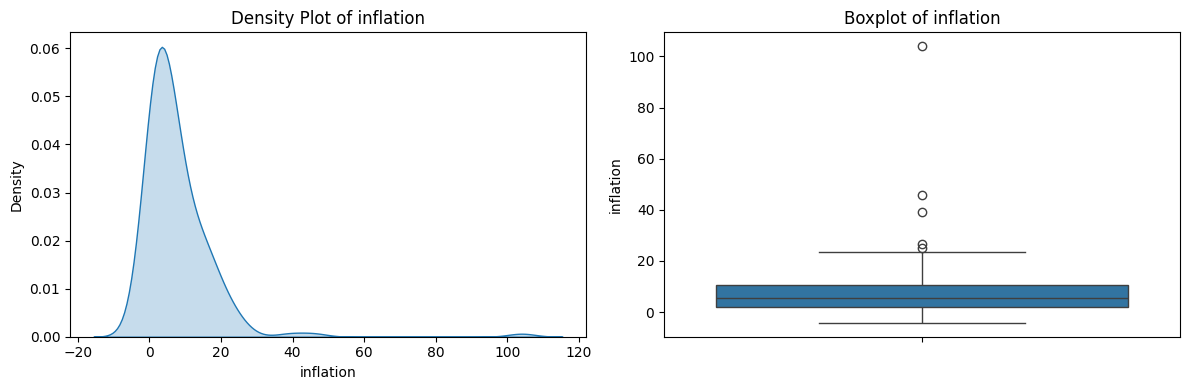

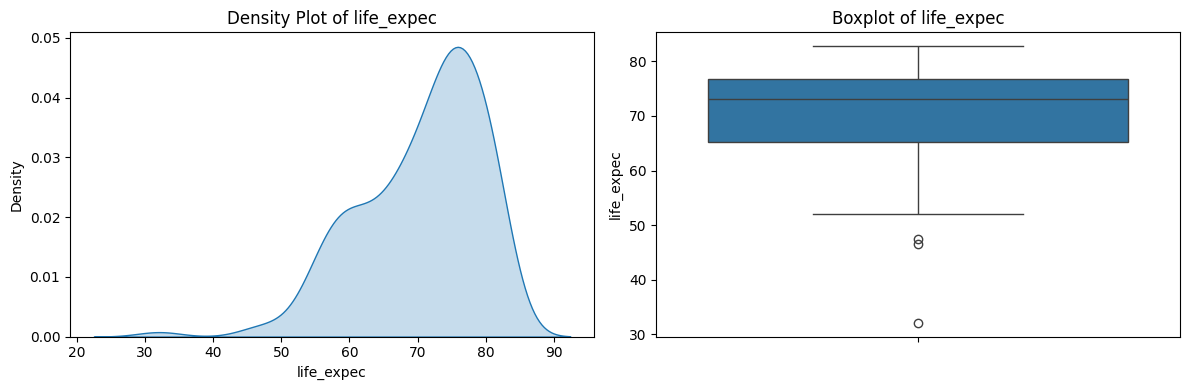

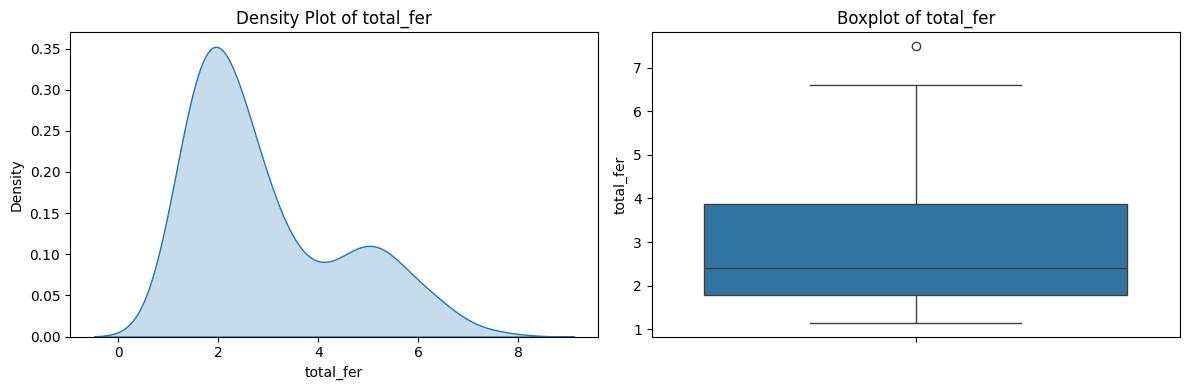

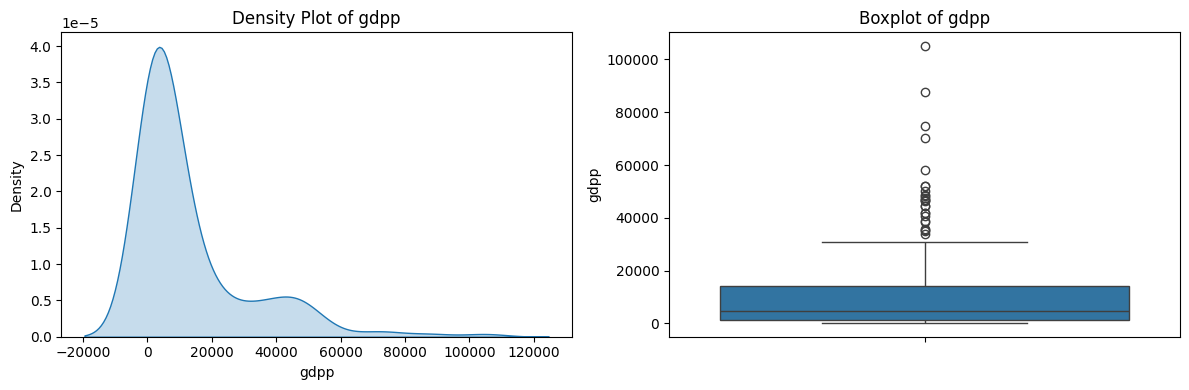

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'Data'

for column in Data.select_dtypes(include=['number']).columns:  # Iterate through numerical columns only
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create a figure with two subplots

    # Density plot
    sns.kdeplot(Data[column], ax=axes[0], fill=True)
    axes[0].set_title(f'Density Plot of {column}')

    # Boxplot
    sns.boxplot(y=Data[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()  # Display the plot

Podemos observar que en prácticamente todas las variables tenemos outliers, lo que representa una gran diferencia entre ciertos países en cuanto a las muertes infantiles, el income entre otras. Podemos comentar al mismo tiempo la asimetría de ciertas variables que indican disparidad de riqueza y calidad de vida.

Obviamente al hacer un estudio individual de la densidad de las variables, el hecho de que estén representadas en escalas diferentes no nos afecta pero  a la hora de implementar un algoritmo de agrupación debemos estandarizarlas para que el método sea efectivo.

## 3 Extracción de las características

**Ejercicio 2** - Realizaremos transformaciones en nuestros datos en crudo para obtener las variables con las que realizar el clustering.

*   Muestra la matriz de correlaciones por pantalla y comenta resumidamente sus conclusiones.

*   Vamos a **agrupar todas nuestras nueve variables en tres grandes indicadores** diferentes: **Salud** (4 variables), **Comercio** (2 variables) y **Finanzas** (3 variables). Definir las agrupaciones en base a lo que significa cada variable. Para construir cada uno de los indicadores, sumaremos cada una de las variables agrupadas en ese indicador dividida por su media (Por ejemplo: Comercio = (variable1/media_variable1) + (variable2/media_variable2)

* Una vez construidos los indicadores, tenemos que asegurarnos que los tres estén a la **misma escala**. Para ello tenemos que decidirnos por la **estandarización** o la **normalización**, ambas funciones nativas de SKLearn. Visualiza la distribución de los 3 grandes indicadores, decide que método emplear (estandarización/normalización) y aplícalo a nuestros datos.






**AYUDA ADICIONAL:**

* La normalización se realiza para características cuyos datos no presentan una distribución normal.

* La estandarización se aplica a características con distribución normal, cuyos valores son muy grandes o muy pequeños en comparación con otras características.


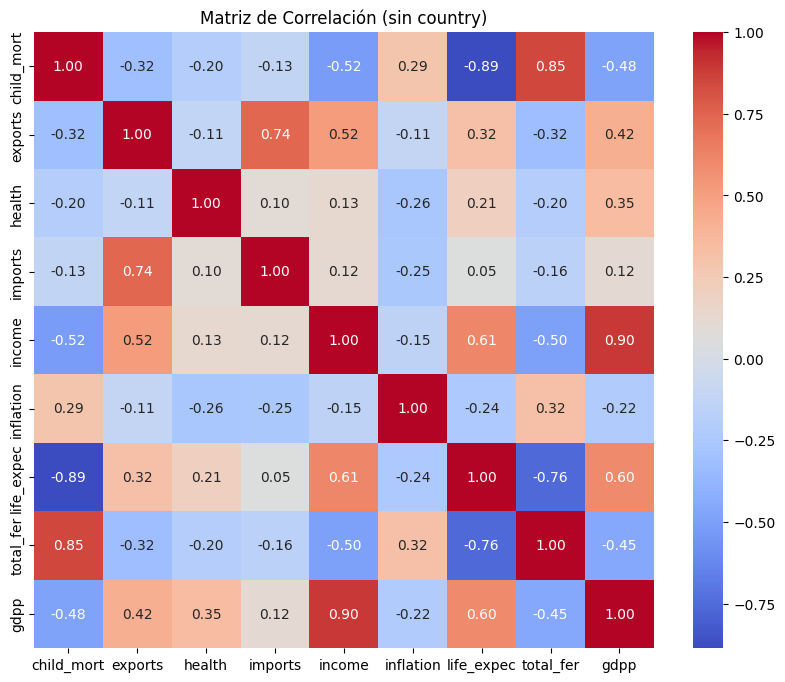

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'Data'

# Select only numerical columns (excluding 'country')
numerical_data = Data.select_dtypes(include=['number']).drop('country', axis=1, errors='ignore')

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (sin country)')
plt.show()

Podemos ver variables altamente relacionadas en nuestra matriz de correlación, esto puede ser un indicador de redundancia.
Si nos acatamos a nuestro objetivo de analizar las características socioeconómicas y determinar la ayuda necesaria para ciertos países, podemos concluir con que las variables tasa de fertilidad y child mort deberían mantenerse aún teneindo gran correlación, de la misma manera child mort y life expectancy.

Sin embargo podemos prescindir de ciertas variables y transformar otras para agilizar nuestro algoritmo, como por ejemplo hacer un balance comecial de exports - imports y quitar una de las variables income o ggdp las cuales tienen la correlación más alta de nuestra tabla.

In [ ]:
DataIndicators = pd.DataFrame(index=Data.index)

# Crear indicador de Salud
DataIndicators['Salud'] = (Data['child_mort'] / Data['child_mort'].mean() +
                 Data['life_expec'] / Data['life_expec'].mean() +
                 Data['health'] / Data['health'].mean() +
                 Data['total_fer'] / Data['total_fer'].mean())

# Crear indicador de Comercio
DataIndicators['Comercio'] = (Data['exports'] / Data['exports'].mean() +
                   Data['imports'] / Data['imports'].mean())

# Crear indicador de Finanzas
DataIndicators['Finanzas'] = (Data['income'] / Data['income'].mean() +
                   Data['inflation'] / Data['inflation'].mean() +
                   Data['gdpp'] / Data['gdpp'].mean())

In [ ]:
DataIndicators.head()

,Salud,Comercio,Finanzas
0,6.239852,1.200812,1.349645
1,3.035901,1.717580,1.471658
2,3.389763,1.603752,3.165367
3,6.469020,2.430387,3.494919
4,2.964898,2.362940,2.240150


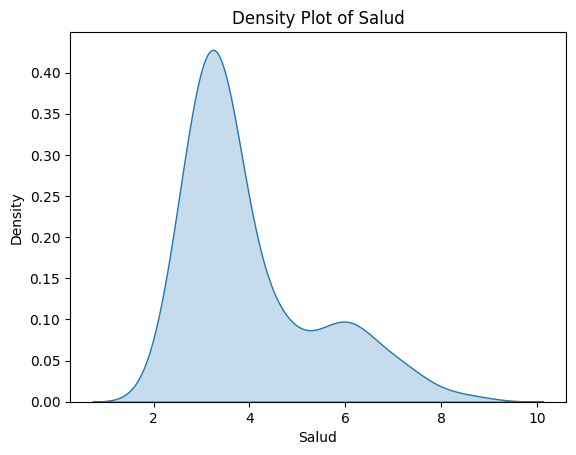

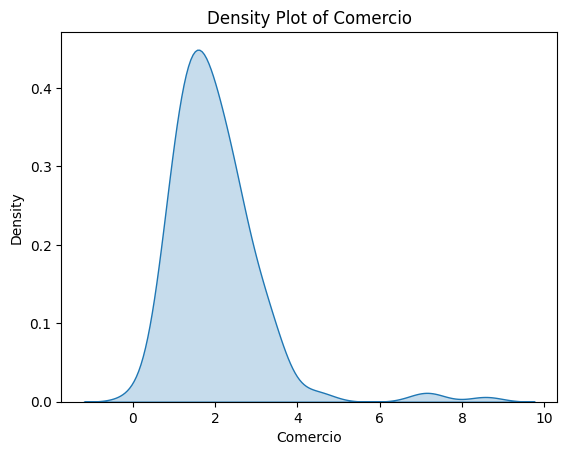

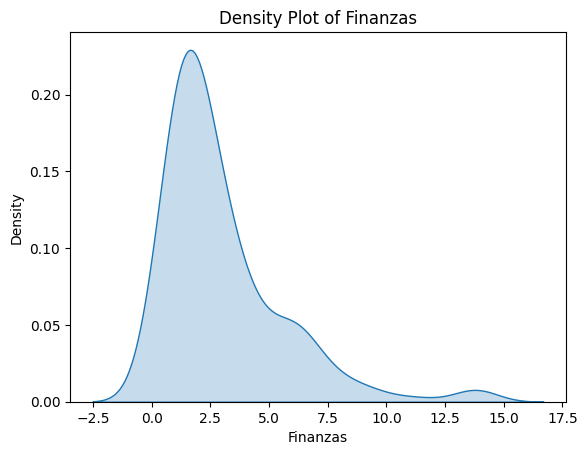

In [ ]:


# Visualize the distributions indicators:
for column in ['Salud', 'Comercio', 'Finanzas']:
    sns.kdeplot(DataIndicators[column], fill=True)
    plt.title(f'Density Plot of {column}' )
    plt.show()

Tenemos bastantes outliers los cuales son importantes para visualizar la verdadera tendencia de nuestros datos, ya que representan la diferencia entre países del 1er mundo y 3er. Por eso hacenos una normalización en el caso de finanzas y salud.Estandarizamos en comercio que tiene una distribución más normal.

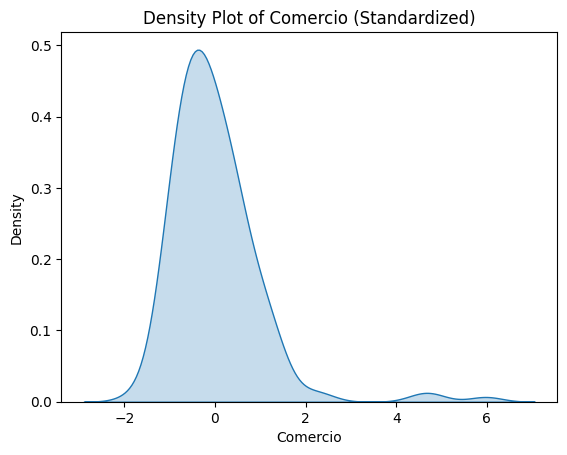

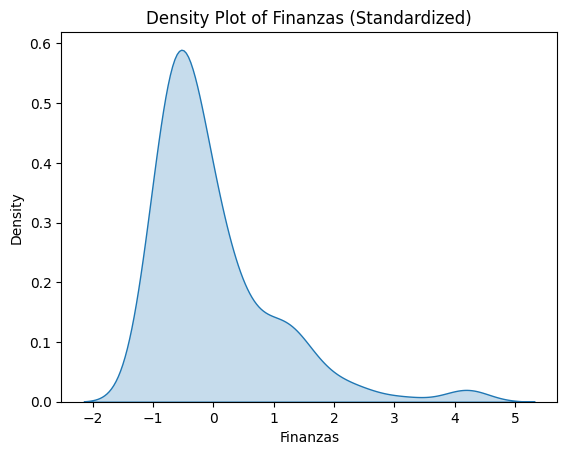

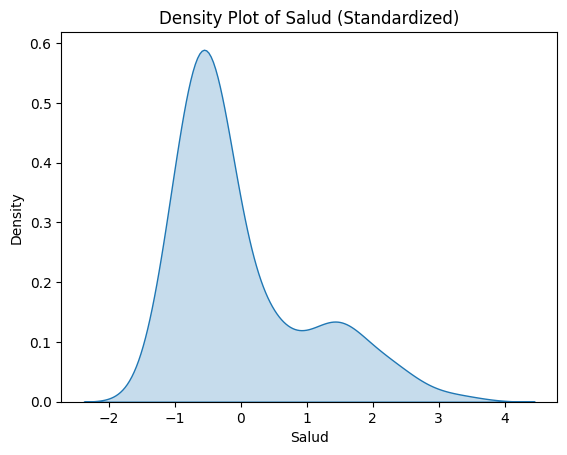

In [ ]:
#Estandarizo todo
from sklearn.preprocessing import StandardScaler
scaler2= StandardScaler()
DataIndicators[['Comercio','Finanzas','Salud']] = scaler2.fit_transform(DataIndicators[['Comercio','Finanzas','Salud']])

#Hago el ploteo
for column in ['Comercio','Finanzas','Salud']:
    sns.kdeplot(DataIndicators[column], fill=True)
    plt.title(f'Density Plot of {column} (Standardized)')
    plt.show()

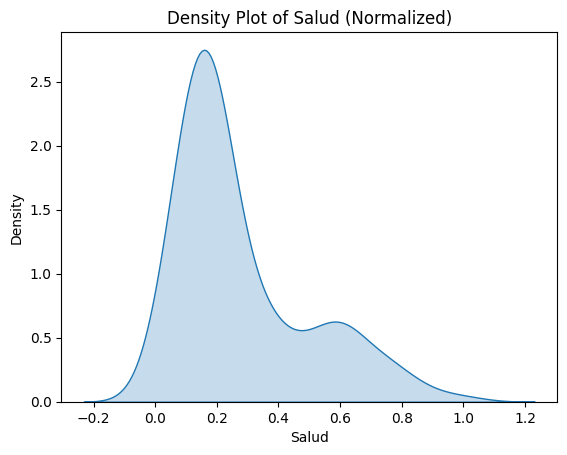

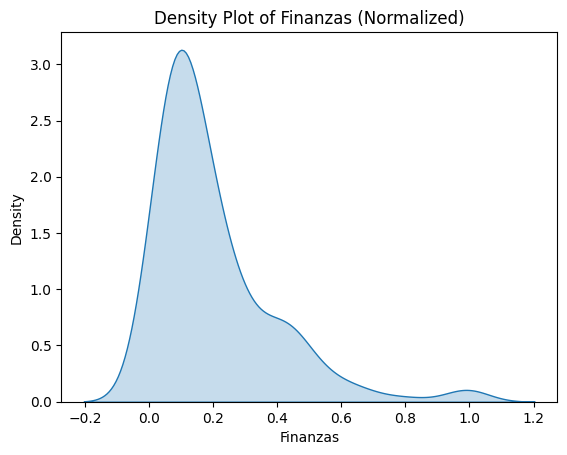

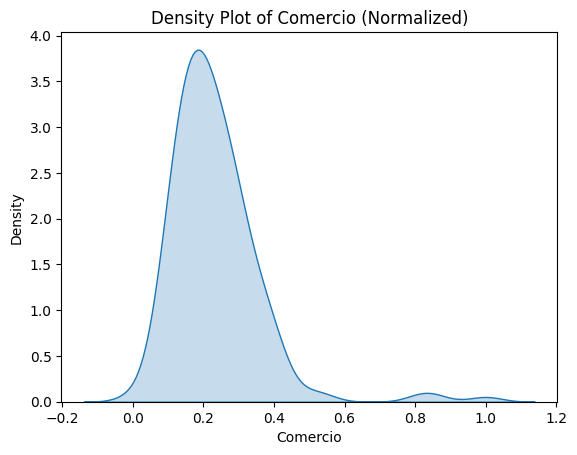

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
DataIndicators[['Salud', 'Finanzas','Comercio']] = scaler.fit_transform(DataIndicators[['Salud',  'Finanzas','Comercio']])

# Visualize the distributions of the normalized indicators:
for column in ['Salud', 'Finanzas','Comercio']:
    sns.kdeplot(DataIndicators[column], fill=True)
    plt.title(f'Density Plot of {column} (Normalized)')
    plt.show()

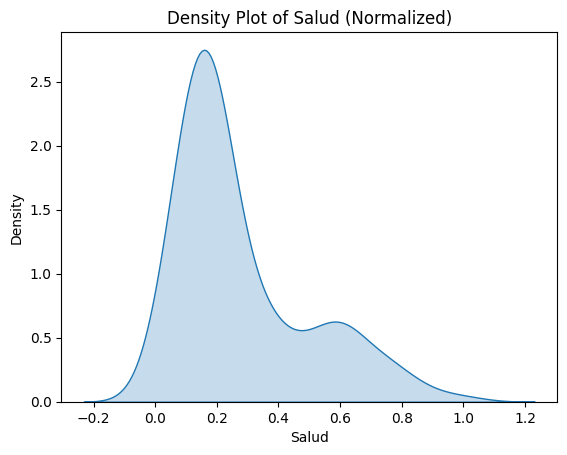

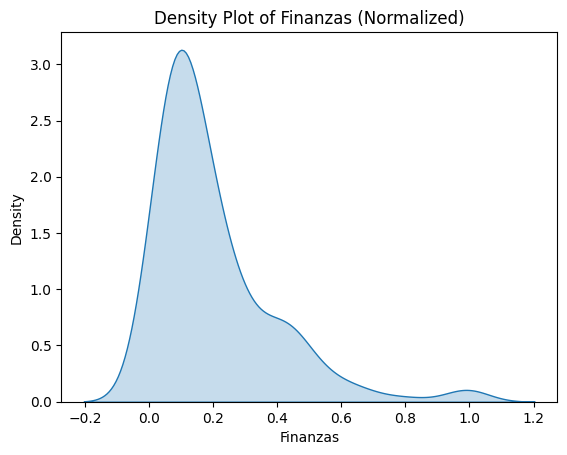

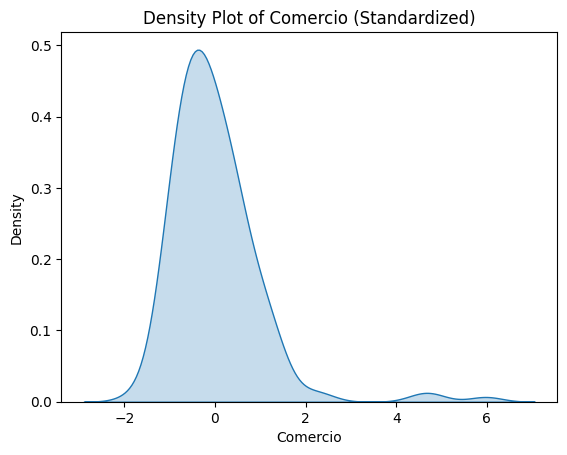

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
DataIndicators[['Salud', 'Finanzas']] = scaler.fit_transform(DataIndicators[['Salud',  'Finanzas']])

# Visualize the distributions of the normalized indicators:
for column in ['Salud', 'Finanzas']:
    sns.kdeplot(DataIndicators[column], fill=True)
    plt.title(f'Density Plot of {column} (Normalized)')
    plt.show()


scaler2= StandardScaler()
DataIndicators[['Comercio']] = scaler2.fit_transform(DataIndicators[['Comercio']])

#Hago el ploteo
for column in ['Comercio']:
    sns.kdeplot(DataIndicators[column], fill=True)
    plt.title(f'Density Plot of {column} (Standardized)')
    plt.show()

In [ ]:
DataIndicators.head()

,Salud,Comercio,Finanzas
0,0.625740,0.139614,0.079820
1,0.127451,0.199901,0.088756
2,0.182485,0.186622,0.212808
3,0.661381,0.283058,0.236946
4,0.116409,0.275189,0.145043


## 4 Entrenamiento y evaluación del modelo

**Ejercicio 3**: Una vez tenemos los datos estandarizados, procedemos a aplicar nuestro método de agrupación.

*  **Selección del algoritmo de clustering**: Argumentar de manera razonada, teniendo en cuenta nuestro problema concreto, que método de agrupación es mejor aplicar en este caso. Existe uno claramente diferenciado.

* **Ajuste de hiperparámetro/s**: Una vez seleccionado el modelo, ajusta los hiperparámetro/s para decidir el o los mejores valores del mismo. Recuerda utilizar todas las técnicas vistas en clase y hacer un análisis completo de la situación para poder tomar la decisión con toda la información disponible. La elección de los valor/es de los hiperparámetros deben estar justificados con gran profundidad y evidencias.

* **Evaluación de la agrupación**: Utiliza métricas vistas en clase y la representación visual de la agrupación final realizada para valorar la calidad de la misma. Usa las librerías 2D y 3D vistas en las prácticas.





Tenemos dos tipos de algoritmos claramente diferenciados, k-mans y DBscan, sabemos que tenemos un problema complejo ya que tenemos un análisis socioeconómico, por lo tanto k-means al asumir clusteres esféricos tiene una desventaja en este caso, en el caso de DBscan tiene la suficiente capacidad de especificación para formar clústeres de casi cualquier forma, lo que parece primeramente más adecuado para nuestro problema.

Además tenemos la presencia de valores atípicos que son importantes para el análisis de la tendencia de nuestros datos, por tanto k-means está en desventaja en este aspecto frente a dbscan ya que este último los identifica y los separa de manera beneficiosa.

 K-Means produce clústeres fáciles de interpretar, ya que cada punto de datos se asigna a un centro de clúster específico. DBSCAN clasifica los puntos como núcleo, borde o ruido, lo que podría requerir una interpretación adicional en el contexto de la asignación de ayuda, lo que nos podría proporcionar un mejor análisis de los países que necesitan ayuda.

 Concluimos con que DBScan es un algoritmo mucho más beneficioso en nuestro caso y por tanto lo implementamos.


Después de la implementación de DBScan probamremos con K-Means y los compararemos

### DBScan

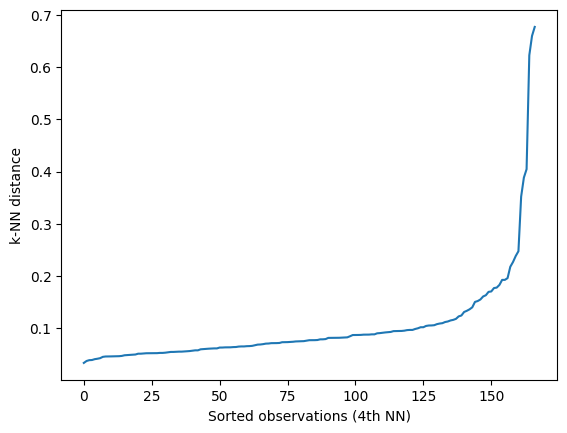

In [ ]:
#Ajustamos los hiperparámetros de DBScan con un estudio previo antes de implementar el método.
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

nbrs = NearestNeighbors(n_neighbors = 5).fit(DataIndicators)
neigh_dist, neigh_ind = nbrs.kneighbors(DataIndicators)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 4] #looking for the min_points - 1 NN ordered.
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

Observando la gráfica tenemos como buen valor de epsilon entre 0,3 y 0,7

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# Range of epsilon values to test
epsilon_range = np.arange(0.05, 0.4, 0.01)  # Start at 0.1, end at 0.9, step by 0.01
min_samples=6
for epsilon in epsilon_range:
    db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(DataIndicators)
    labels = db.labels_
    # Get unique cluster labels and number of clusters

    num_clusters = len(set(labels)) - (1 if -1 in labels else 0) # Exclude noise cluster (-1)

    # Calculate silhouette score if there are at least 2 clusters
    if num_clusters > 1:
        silhouette_avg = silhouette_score(DataIndicators, labels)
        print(f"Epsilon: {epsilon:.2f}, Number of Clusters: {num_clusters}, Silhouette Score: {silhouette_avg:.4f}")
    else:
        print(f"Epsilon: {epsilon:.2f}, Number of Clusters: {num_clusters}, Silhouette Score: N/A (Only one cluster) o muchos outliers")

Epsilon: 0.05, Number of Clusters: 1, Silhouette Score: N/A (Only one cluster) o muchos outliers
Epsilon: 0.06, Number of Clusters: 4, Silhouette Score: -0.1245
Epsilon: 0.07, Number of Clusters: 3, Silhouette Score: 0.0250
Epsilon: 0.08, Number of Clusters: 2, Silhouette Score: 0.2382
Epsilon: 0.09, Number of Clusters: 2, Silhouette Score: 0.2872
Epsilon: 0.10, Number of Clusters: 2, Silhouette Score: 0.3806
Epsilon: 0.11, Number of Clusters: 1, Silhouette Score: N/A (Only one cluster) o muchos outliers
Epsilon: 0.12, Number of Clusters: 1, Silhouette Score: N/A (Only one cluster) o muchos outliers
Epsilon: 0.13, Number of Clusters: 1, Silhouette Score: N/A (Only one cluster) o muchos outliers
Epsilon: 0.14, Number of Clusters: 1, Silhouette Score: N/A (Only one cluster) o muchos outliers
Epsilon: 0.15, Number of Clusters: 1, Silhouette Score: N/A (Only one cluster) o muchos outliers
Epsilon: 0.16, Number of Clusters: 1, Silhouette Score: N/A (Only one cluster) o muchos outliers
Epsil

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Range of epsilon values to test
epsilon_range = np.arange(0.1, 0.9, 0.01)  # Start at 0.1, end at 0.9, step by 0.01
min_samples = 6

for epsilon in epsilon_range:
    db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(DataIndicators)
    labels = db.labels_

    # Calculate noise coefficient
    n_noise = list(labels).count(-1)  # Count points labeled as noise (-1)
    noise_coefficient = n_noise / len(labels)  # Calculate noise coefficient

    # Print noise coefficient along with other information
    print(f"Epsilon: {epsilon:.2f}, Noise Coefficient: {noise_coefficient:.4f}")

Epsilon: 0.10, Noise Coefficient: 0.9222
Epsilon: 0.11, Noise Coefficient: 0.8443
Epsilon: 0.12, Noise Coefficient: 0.7425
Epsilon: 0.13, Noise Coefficient: 0.6108
Epsilon: 0.14, Noise Coefficient: 0.5329
Epsilon: 0.15, Noise Coefficient: 0.4850
Epsilon: 0.16, Noise Coefficient: 0.4551
Epsilon: 0.17, Noise Coefficient: 0.3653
Epsilon: 0.18, Noise Coefficient: 0.3114
Epsilon: 0.19, Noise Coefficient: 0.3114
Epsilon: 0.20, Noise Coefficient: 0.2455
Epsilon: 0.21, Noise Coefficient: 0.2335
Epsilon: 0.22, Noise Coefficient: 0.2096
Epsilon: 0.23, Noise Coefficient: 0.1976
Epsilon: 0.24, Noise Coefficient: 0.1796
Epsilon: 0.25, Noise Coefficient: 0.1497
Epsilon: 0.26, Noise Coefficient: 0.1078
Epsilon: 0.27, Noise Coefficient: 0.0898
Epsilon: 0.28, Noise Coefficient: 0.0898
Epsilon: 0.29, Noise Coefficient: 0.0838
Epsilon: 0.30, Noise Coefficient: 0.0838
Epsilon: 0.31, Noise Coefficient: 0.0719
Epsilon: 0.32, Noise Coefficient: 0.0599
Epsilon: 0.33, Noise Coefficient: 0.0599
Epsilon: 0.34, N

In [ ]:
clusters = DBSCAN(eps = 0.24, min_samples = 6).fit(DataIndicators) #eps 1,5 justo el codo de nuestra curva para no incluit el ruido y MInSamp=6 ya que tenemos 3 características
# get cluster labels
print(clusters.labels_) #labesl
print(clusters.n_features_in_) #features used in calculation
print(clusters.feature_names_in_) #names of features in fit
set(clusters.labels_)

[ 0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1 -1
  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  1  0 -1  0  0  0  0  0  0  0
  0 -1 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0
  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1 -1  0  0 -1  0  0  0  1
  1  0 -1 -1  0  0  0  0  0  0  0 -1  0  0 -1  0  0 -1 -1  0  0  1  0  0
  0  0  0 -1  0  0  0  0  0  0  0 -1 -1 -1  1  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0 -1  0  0  0  0  0  0 -1  0 -1  0  0  0 -1  1  0  0]
3
['Salud' 'Comercio' 'Finanzas']


{-1, 0, 1}

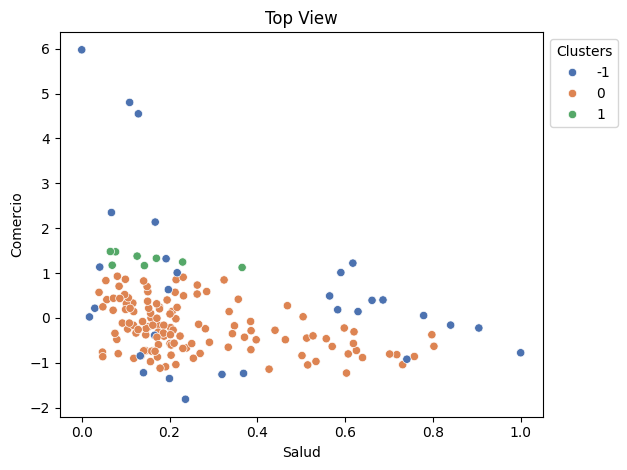

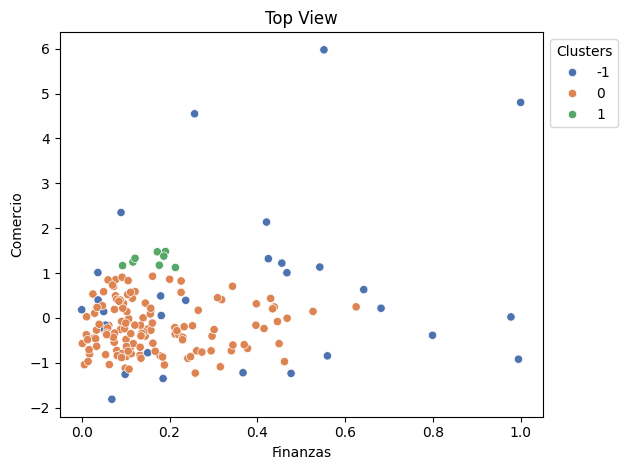

In [ ]:
p = sns.scatterplot(data=DataIndicators, x='Salud', y='Comercio', hue=clusters.labels_, legend='full', palette="deep")
# Changed x='X' to x='Salud' and y='Y' to y='Comercio'
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.), title='Clusters')
plt.title('Top View')
plt.tight_layout()
plt.show()
p = sns.scatterplot(data=DataIndicators, x='Finanzas', y='Comercio', hue=clusters.labels_, legend='full', palette="deep")
# Changed x='X' to x='Salud' and y='Y' to y='Comercio'
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.), title='Clusters')
plt.title('Top View')
plt.tight_layout()
plt.show()



<ipython-input-40-6385136a49cd>:14: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



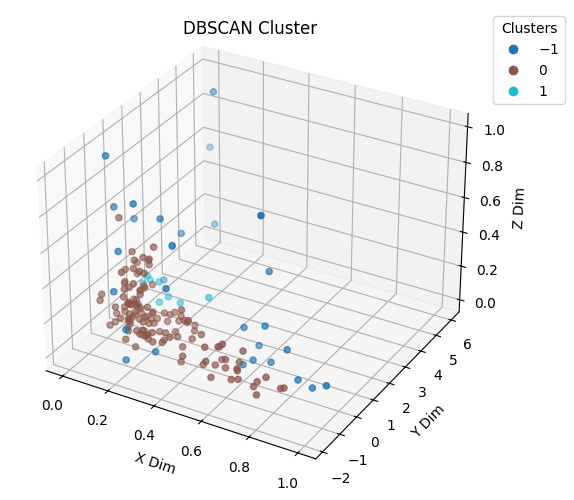

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure = False)
fig.add_axes(ax)
cmap = ListedColormap(sns.color_palette("tab10").as_hex())
sc = ax.scatter(DataIndicators['Salud'],DataIndicators['Comercio'],DataIndicators['Finanzas'], c = clusters.labels_, cmap = cmap)
ax.set_xlabel('X Dim')
ax.set_ylabel('Y Dim')
ax.set_zlabel('Z Dim')
plt.legend(*sc.legend_elements(),bbox_to_anchor = (1.17, 1.), title = 'Clusters')
fig.suptitle('DBSCAN Cluster')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(DataIndicators, clusters.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2733405728087768


### K-Means

In [ ]:
#APlicamos el método del codo y la shilouette para poder ver cuales son los mejores hiperparámetros
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sum_of_squared_distances = []
#HAcemos un bucle para ver cual es ek k más óptimo
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    kmeans.fit(DataIndicators)
    sum_of_squared_distances.append(kmeans.inertia_) # Append inertia_ to the list

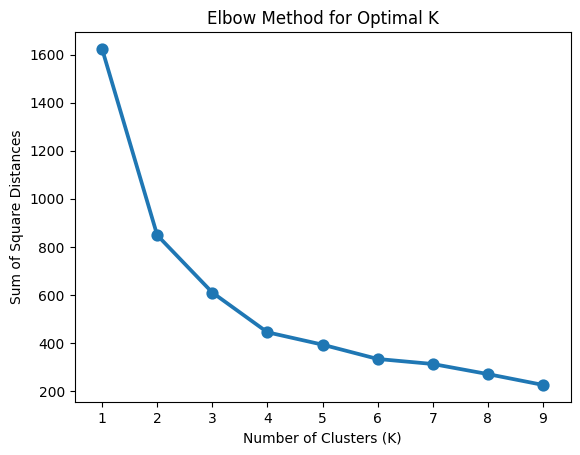

In [ ]:
#PLoteo los resultado s
import seaborn as sns
import matplotlib.pyplot as plt

# Create a range of K values corresponding to the inertia values
k_values = range(1, len(sum_of_squared_distances) + 1)

sns.pointplot(x=k_values, y=sum_of_squared_distances)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

In [ ]:
#AHora shilouette
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    kmeans.fit(DataIndicators)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(DataIndicators, labels)
    silhouette_scores.append(silhouette_avg)

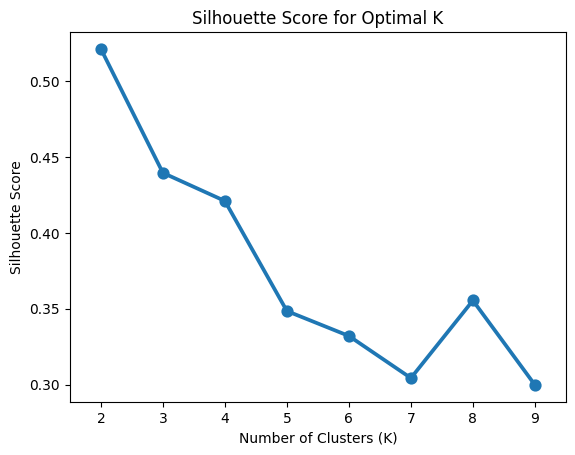

In [ ]:
#PLoteo
import seaborn as sns
import matplotlib.pyplot as plt

# Create a range of K values corresponding to the silhouette scores
k_values = range(2, 10)

sns.pointplot(x=k_values, y=silhouette_scores)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()

Escogemos shilouette con k=3 es el máximo valor con un número de clusters representativo para nuestros datos

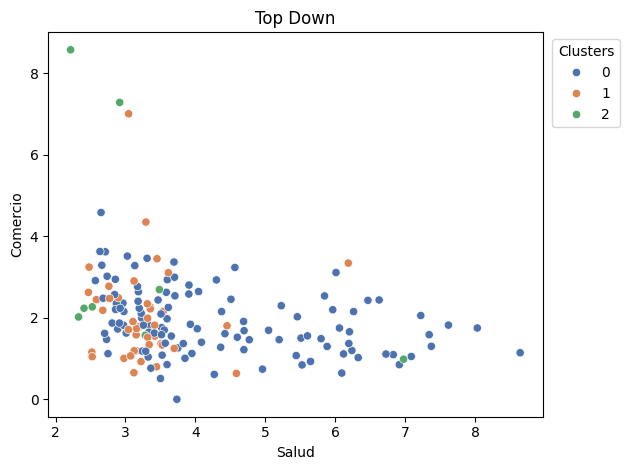

In [ ]:
km = KMeans(n_clusters = 3, init='k-means++', max_iter=1000)
km.fit(DataIndicators)
Grouping_Labels = km.labels_
p = sns.scatterplot(data = DataIndicators, x = 'Salud',  y= 'Comercio', hue = Grouping_Labels, legend = 'full', palette = "deep") # Changed x='X' to x='Salud' and y='Y' to y='Comercio'
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.title('Top Down')
plt.tight_layout()
plt.show()

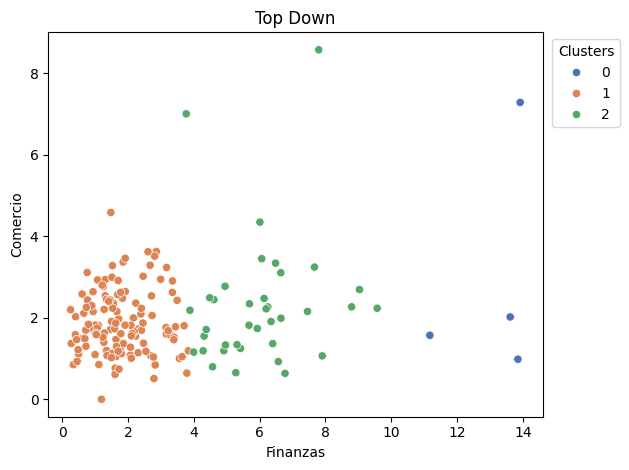

In [ ]:
km = KMeans(n_clusters = 3, init='k-means++', max_iter=1000)
km.fit(DataIndicators)
Grouping_Labels = km.labels_
p = sns.scatterplot(data = DataIndicators, x = 'Finanzas',  y= 'Comercio', hue = Grouping_Labels, legend = 'full', palette = "deep") # Changed x='X' to x='Salud' and y='Y' to y='Comercio'
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.title('Top Down')
plt.tight_layout()
plt.show()

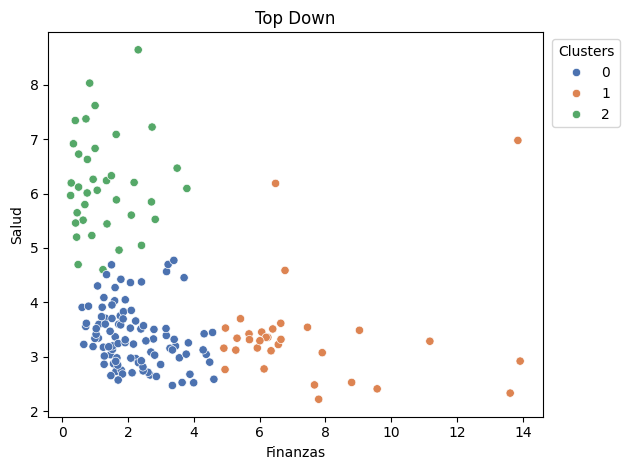

In [ ]:
km = KMeans(n_clusters = 3, init='k-means++', max_iter=1000)
km.fit(DataIndicators)
Grouping_Labels = km.labels_
p = sns.scatterplot(data = DataIndicators, x = 'Finanzas',  y= 'Salud', hue = Grouping_Labels, legend = 'full', palette = "deep") # Changed x='X' to x='Salud' and y='Y' to y='Comercio'
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.title('Top Down')
plt.tight_layout()
plt.show()

<ipython-input-70-3014b319fcb4>:31: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



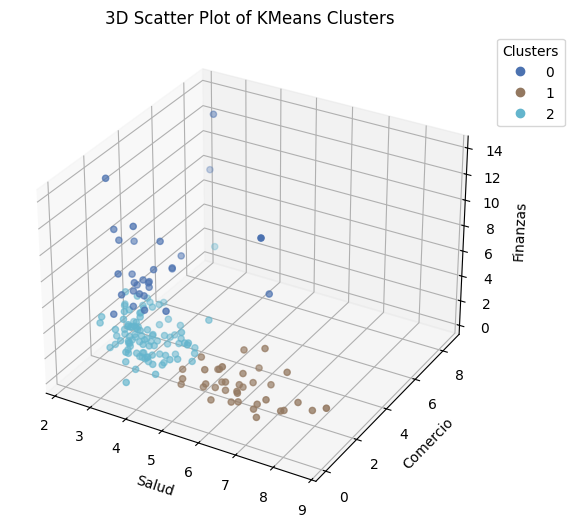

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Import the necessary module for 3D plotting
from matplotlib.colors import ListedColormap # For custom colormaps
import seaborn as sns

km = KMeans(n_clusters=3, init='k-means++', max_iter=1000)
km.fit(DataIndicators)
Grouping_Labels = km.labels_

# Create a figure and a 3D axes object
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# Create a colormap based on the seaborn palette
cmap = ListedColormap(sns.color_palette("deep").as_hex())

# Create the scatter plot
sc = ax.scatter(DataIndicators['Salud'], DataIndicators['Comercio'], DataIndicators['Finanzas'],
                c=Grouping_Labels, cmap=cmap) # Use Grouping_Labels for color

# Set axis labels and title
ax.set_xlabel('Salud')
ax.set_ylabel('Comercio')
ax.set_zlabel('Finanzas')
plt.title('3D Scatter Plot of KMeans Clusters')

# Add a legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.17, 1.), title='Clusters')

plt.tight_layout()
plt.show()

## 5 Análisis de resultados y conclusión del problema.

**Ejercicio 4**: Interpretar y explicar los resultados obtenidos en base a nuestro problema concreto.

* Desde la ONG se tiene conocimiento de que las variables más representativas para decidir si un país necesita o no ayuda son el ingreso neto (income) y la mortalidad infantil (child_mort). Dibuja un boxplot de ambas variables respecto a los clústeres etiquetados para determinar el nivel de ayuda para cada uno de los diferentes grupos. **Nota**: Si hemos obtenido dos clústers finales, los niveles de ayuda serán (necesita ayuda/no necesita ayuda), si son 3 (no necesita ayuda / necesita ayuda moderada/ necesita mucha ayuda) y así sucesivamente.

*   Utilizando la librería *kaileido* y *plotly.express* **dibuja un mapa mundi** dónde se refleje el nivel de ayuda necesario por país en función de los clústeres realizados. Que cada nivel de ayuda (clúster) tenga un color diferente.


*   **Conclusiones**: En función de nuestro análisis, ¿qué países debería priorizar Ayuda Internacional para depositar su ayuda y sus recursos? ¿Qué mejoras o implementaciones podríamos hacer a este análisis para mejorar sus resultados? Razona las respuestas de manera argumentada.

###DBScan Mapa y Boxplot

In [ ]:
import plotly.express as px

# Assuming 'Data' is your DataFrame with 'country' and 'Aid Level' columns

# Create a world map with color-coded countries based on 'Aid Level'
fig = px.choropleth(
    Data,
    locations="country",
    locationmode="country names",
    color="Aid Level",
    color_discrete_sequence=px.colors.qualitative.Set3,  # Use a color sequence
    title="World Map of Aid Levels",
)

# Update layout for better visualization
fig.update_geos(
    visible=False,  # Hide unnecessary geographic features
    resolution=50,  # Adjust resolution for smoother map
    showcountries=True,
    countrycolor="black",  # Add country borders
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type="equirectangular",  # Use a projection
    ),
    margin={"r": 0, "t": 50, "l": 0, "b": 0},  # Adjust margins
)

# Show the map
fig.show()

# Save the map as a static image using kaleido
fig.write_image("world_map_aid_levels.png", engine="kaleido")

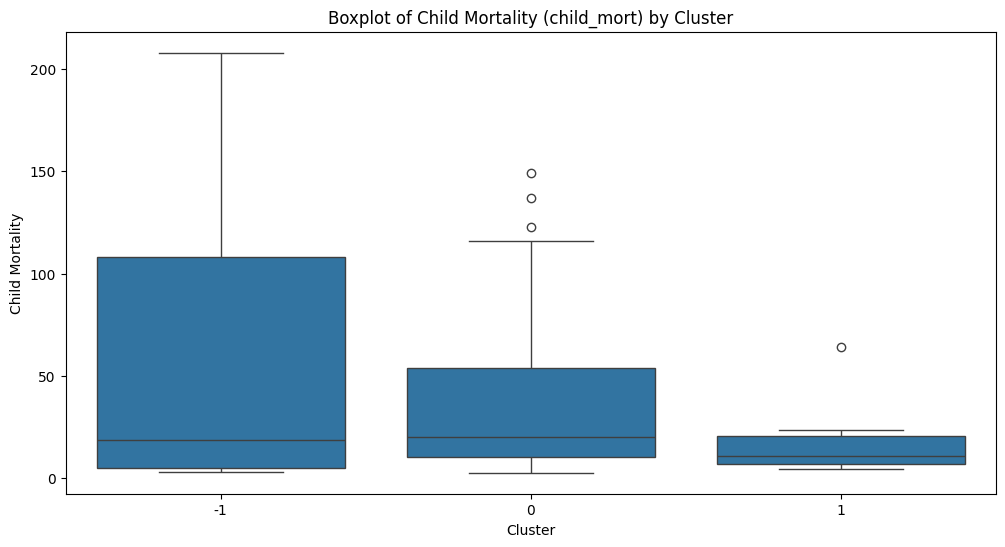

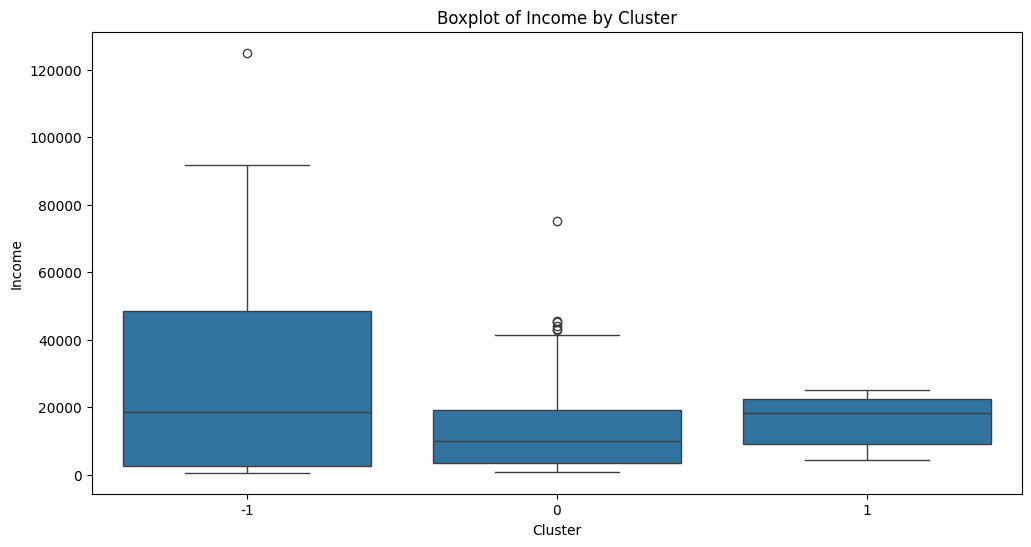

                 country  Cluster                    Aid Level
0            Afghanistan        0                No aid needed
1                Albania        0                No aid needed
2                Algeria        0                No aid needed
3                 Angola       -1  Needs further investigation
4    Antigua and Barbuda        0                No aid needed
..                   ...      ...                          ...
162              Vanuatu        0                No aid needed
163            Venezuela       -1  Needs further investigation
164              Vietnam        1              High aid needed
165                Yemen        0                No aid needed
166               Zambia        0                No aid needed

[167 rows x 3 columns]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Data' is your DataFrame with 'Cluster' column representing cluster labels
Data['Cluster'] = clusters.labels_

# Boxplot for child_mort
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='child_mort', data=Data)
plt.title('Boxplot of Child Mortality (child_mort) by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Child Mortality')
plt.show()

# Boxplot for income
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='income', data=Data)
plt.title('Boxplot of Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

# Determine aid levels based on clusters and boxplots
# Cluster -1: Outliers/Noise -> Needs further investigation or special consideration
# Cluster 0: Lowest child_mort, highest income -> No aid needed
# Cluster 1: Highest child_mort, lowest income -> High aid needed


aid_levels = {
    -1: 'Needs further investigation',
    0: 'No aid needed',
    1: 'High aid needed'
}

# Add an 'Aid Level' column to your DataFrame based on the mapping
Data['Aid Level'] = Data['Cluster'].map(aid_levels)

# Print or display the DataFrame with the 'Aid Level' column
print(Data[['country', 'Cluster', 'Aid Level']])

### K-Means Mapa y Boxplot

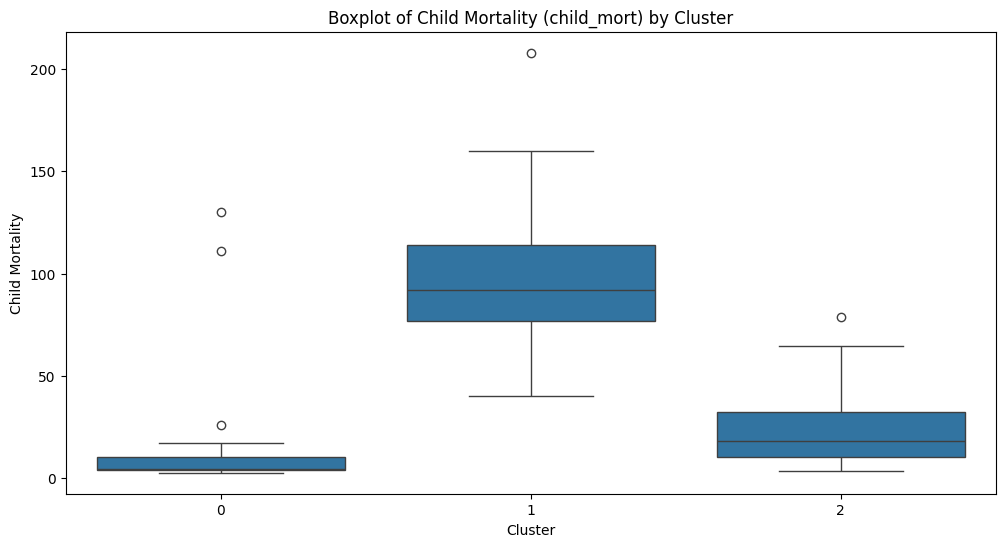

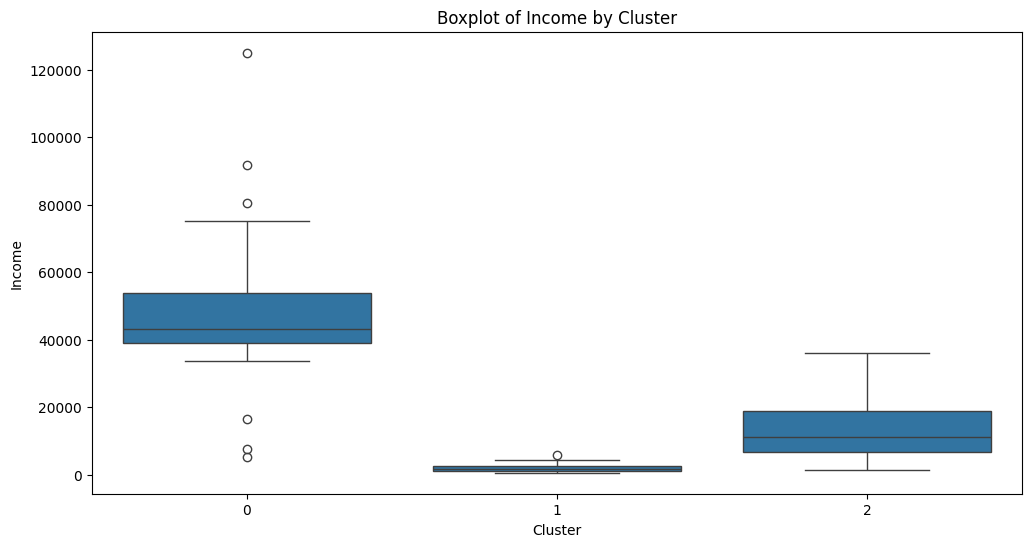

                 country  Cluster           Aid Level
0            Afghanistan        1      Needs high aid
1                Albania        2  Needs Moderate aid
2                Algeria        2  Needs Moderate aid
3                 Angola        1      Needs high aid
4    Antigua and Barbuda        2  Needs Moderate aid
..                   ...      ...                 ...
162              Vanuatu        2  Needs Moderate aid
163            Venezuela        0       No aid needed
164              Vietnam        2  Needs Moderate aid
165                Yemen        2  Needs Moderate aid
166               Zambia        1      Needs high aid

[167 rows x 3 columns]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Data' is your DataFrame with 'Cluster' column representing cluster labels
Data['Cluster'] = km.labels_  # Assign cluster labels from KMeans

# Boxplot for child_mort
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='child_mort', data=Data)
plt.title('Boxplot of Child Mortality (child_mort) by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Child Mortality')
plt.show()

# Boxplot for income
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='income', data=Data)
plt.title('Boxplot of Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

# Determine aid levels based on clusters and boxplots
# Analyze the boxplots to determine aid level for each cluster:

# Example interpretation (adjust based on your boxplot observations):
# Cluster 0: Lowest child_mort, highest income -> No aid needed
# Cluster 1: Moderate child_mort, moderate income -> Needs moderate aid
# Cluster 2: Highest child_mort, lowest income -> Needs high aid

aid_levels = {
    0: 'No aid needed',
    1: 'Needs high aid',
    2: 'Needs Moderate aid'
}

# Add an 'Aid Level' column to your DataFrame based on the mapping
Data['Aid Level'] = Data['Cluster'].map(aid_levels)

# Print or display the DataFrame with the 'Aid Level' column
print(Data[['country', 'Cluster', 'Aid Level']])

In [ ]:
import plotly.express as px

# Assuming 'Data' is your DataFrame with 'country' and 'Aid Level' columns

# Create a world map with color-coded countries based on 'Aid Level'
fig = px.choropleth(
    Data,
    locations="country",
    locationmode="country names",
    color="Aid Level",
    color_discrete_sequence=px.colors.qualitative.Set3,  # Use a color sequence
    title="World Map of Aid Levels",
)

# Update layout for better visualization
fig.update_geos(
    visible=False,  # Hide unnecessary geographic features
    resolution=50,  # Adjust resolution for smoother map
    showcountries=True,
    countrycolor="black",  # Add country borders
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type="equirectangular",  # Use a projection
    ),
    margin={"r": 0, "t": 50, "l": 0, "b": 0},  # Adjust margins
)

# Show the map
fig.show()

# Save the map as a static image using kaleido
fig.write_image("world_map_aid_levels.png", engine="kaleido")

Podemos observar que el modelo hace una agrupación precisa en cuanto a los países que necesitan ayuda y los que no, destacando países 'Ricos' como  no necesitados y países pertenecientes al 3er mundo como necesitados, estando la mayor concenttración de ellos en áfrica, lo cual tiene sentido. Los países en amarillo son países que presentan un nivel socioeconómico medio, en los cuales etán presentes algunos países de sudamérica, asia central y algunos en europa.

En este caso, K-Means ha producido clústeres que se alinean con la intuición y el conocimiento previo sobre los países y sus necesidades. Los boxplots de "child_mort" e "income" muestran una clara separación entre los clústeres, lo que refuerza la validez de los resultados frente a los de DBScan que se centra más en la detección de outliers y enclasificar los puntos como nucleo borde o ruido, lo cual en este caso es ineficiente.